# Lassa data set evaluation

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def histograms(stats):
    # Creating histograms with custom labels
    fig, axes = plt.subplots(2, 2, figsize=(5, 4))  # Adjust grid if you have a different layout

    stats[['N_share', 'Length', 'RelativeLength', 'RelativeError']].hist(
        bins=50, log=True, ax=axes
    )

    # Setting y-axis label for the left column
    axes[0, 0].set_ylabel('Number of sequences')
    axes[1, 0].set_ylabel('Number of sequences')

    axes[0, 0].set_xlim(0, 1)
    axes[0, 1].set_xlim(left=0)
    axes[1, 0].set_xlim(left=0)
    axes[1, 1].set_xlim(0, 1)

    # Setting x-axis labels with the feature names
    features = ['N_share', 'Length', 'RelativeLength', 'RelativeError']
    for ax, feature in zip(axes.flatten(), features):
        ax.set_xlabel(feature)
        ax.set_title('')  # Remove the title above each plot

    plt.tight_layout()
    plt.show()

Data ingestion. We also compute the edit distance in relation to the sequence length and the sequence length in relation to the reference length

In [4]:
fname_stats = "../data/lassa/all/collected_stats.tsv"
seqstats = pd.read_csv(fname_stats, sep='\t')
seqstats['RelativeLength'] = seqstats['Length'] / seqstats['ReferenceLength']
seqstats['RelativeError'] = seqstats['EditDistance'] / seqstats['Length']
seqstats

,Sequence,N_share,Length,Orientation,Reference,EditDistance,ReferenceLength,Segment,RelativeLength,RelativeError
0,AY179171.1,0.0,7227,forward,FR832710.1,0.0,7267.0,L,0.994496,0.000000
1,FR832710.1,0.0,7267,forward,FR832710.1,0.0,7267.0,L,1.000000,0.000000
2,GU573541.1,0.0,754,reverse,FR832710.1,92.0,7267.0,L,0.103757,0.122016
3,GU573542.1,0.0,754,reverse,FR832710.1,91.0,7267.0,L,0.103757,0.120690
4,GU573543.1,0.0,754,reverse,FR832710.1,91.0,7267.0,L,0.103757,0.120690
...,...,...,...,...,...,...,...,...,...,...
2945,LC388587.1,0.0,281,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2946,LC388588.1,0.0,281,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2947,LC388589.1,0.0,281,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2948,MT119502.1,0.0,223,unmapped,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
seqstats[seqstats['Orientation'] == 'unmapped']

,Sequence,N_share,Length,Orientation,Reference,EditDistance,ReferenceLength,Segment,RelativeLength,RelativeError
2933,HM143866.1,0.0,237,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2934,HM143867.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2935,HM143876.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2936,HM143879.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2937,JN651370.1,0.0,237,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2938,JN651374.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2939,JN651382.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2940,JN651388.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2941,JN651389.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN
2942,JN651395.1,0.0,234,unmapped,NaN,NaN,NaN,NaN,NaN,NaN


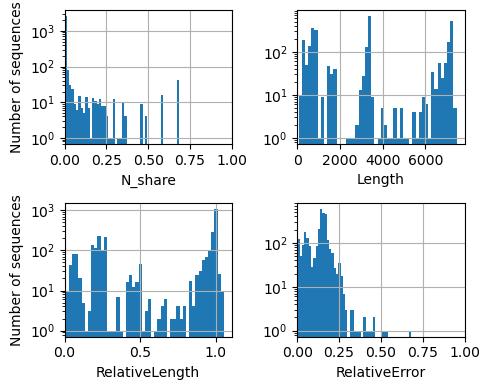

In [6]:
histograms(seqstats)

Let's have a look at the sequences with the highest N-share

In [7]:
seqstats.nlargest(5, 'N_share')

,Sequence,N_share,Length,Orientation,Reference,EditDistance,ReferenceLength,Segment,RelativeLength,RelativeError
1225,MH157051.1,0.686974,6418,forward,GU481069.1,352.0,7230.0,L,0.88769,0.054846
1226,MH157051.1,0.686974,6418,forward,GU481069.1,648.0,7230.0,L,0.88769,0.100966
1227,MH157051.1,0.686974,6418,forward,GU481069.1,183.0,7230.0,L,0.88769,0.028514
1228,MH157051.1,0.686974,6418,forward,GU481069.1,175.0,7230.0,L,0.88769,0.027267
1229,MH157051.1,0.686974,6418,forward,GU481069.1,352.0,7230.0,L,0.88769,0.054846


We remove all sequences that are too short or have a too high share of Ns.

In [8]:
minlen = 2000
max_n_share = 0.1 

print('Total:', len(seqstats))
print('Unmapped:', len(seqstats[seqstats['Orientation'] == 'unmapped']))
print(f'N-share larger than {max_n_share}:', len(seqstats[seqstats['N_share'] > max_n_share]))
print(f'Length smaller than {minlen}:', len(seqstats[seqstats['Length'] < minlen]))

seqstats_high_coverage = seqstats[
    (seqstats['N_share'] <= max_n_share)
    & (seqstats['Length'] >= minlen)
    & (seqstats['Orientation'] != 'unmapped')
]
print('After filtering:', len(seqstats_high_coverage))

Total: 2950
Unmapped: 17
N-share larger than 0.1: 198
Length smaller than 2000: 1186
After filtering: 1579


Lets look at the relative length and error statistics.

array([[<Axes: title={'center': 'RelativeLength'}>,
        <Axes: title={'center': 'RelativeError'}>]], dtype=object)

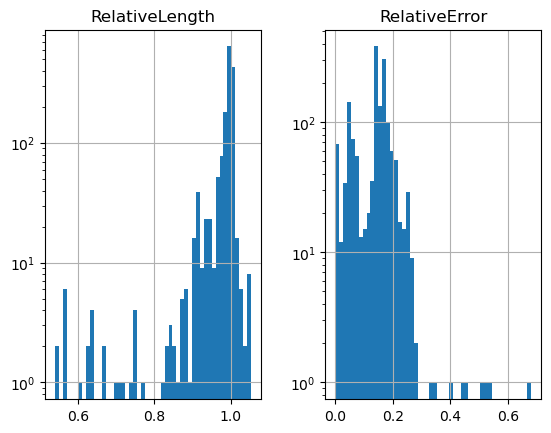

In [9]:
seqstats_high_coverage[['RelativeLength', 'RelativeError']].hist(bins=50, log=True)

Lets remove all sequences with a relative length below 0.8.

In [10]:
min_relative_length = 0.95
seqstats_target_covered = seqstats_high_coverage[seqstats_high_coverage['RelativeLength'] > min_relative_length]
print(f'{len(seqstats_target_covered)} sequences remain of originally {len(seqstats)}')

1422 sequences remain of originally 2950


And look again at the error distribution.

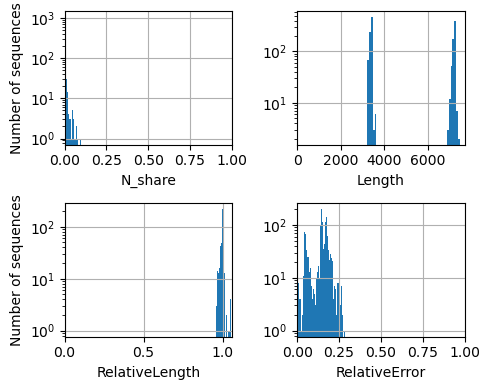

In [11]:
histograms(seqstats_target_covered)

Let's look at the shortest sequences

In [12]:
seqstats_target_covered.nsmallest(5, 'RelativeLength')

,Sequence,N_share,Length,Orientation,Reference,EditDistance,ReferenceLength,Segment,RelativeLength,RelativeError
660,MK118023.1,0.019315,3210,reverse,GU481068.1,497.0,3377.0,S,0.950548,0.154829
417,MH887794.1,0.009950,3216,reverse,GU481068.1,482.0,3377.0,S,0.952325,0.149876
1954,OQ919514.1,0.000000,3247,forward,HQ688672.1,176.0,3401.0,S,0.954719,0.054204
478,MH887856.1,0.000000,3226,reverse,GU481068.1,473.0,3377.0,S,0.955286,0.146621
513,MH887891.1,0.003095,3231,reverse,GU481068.1,494.0,3377.0,S,0.956766,0.152894


We look at the sequences with the highest relative error.

In [13]:
seqstats_target_covered.nlargest(5, 'RelativeError')

,Sequence,N_share,Length,Orientation,Reference,EditDistance,ReferenceLength,Segment,RelativeLength,RelativeError
2794,MH053466.1,0.046136,7001,forward,OL774860.1,1988.0,7170.0,L,0.976430,0.283959
2829,MK117905.1,0.021283,7001,forward,OL774860.1,1878.0,7170.0,L,0.976430,0.268247
2824,MK107886.1,0.011002,7362,forward,OL774860.1,1969.0,7170.0,L,1.026778,0.267454
2830,MK117924.1,0.031058,7148,forward,OL774860.1,1906.0,7170.0,L,0.996932,0.266648
2817,MK107876.1,0.011920,7215,forward,OL774860.1,1901.0,7170.0,L,1.006276,0.263479


For now I do not filter further. Hence, there is no filter on the RelativeError here. 

Let's have a look at the reference distribution

In [14]:
seqstats_target_covered['Reference'].value_counts()

Reference
GU481068.1     480
GU481069.1     406
HQ688674.1     157
NC_004296.1    136
HQ688672.1      68
OL774861.1      60
OL774860.1      49
FR832711.1      15
KU961971.1      14
KU961972.2      13
NC_004297.1      7
FR832710.1       6
KM822128.1       5
KM822127.1       2
KT992425.1       2
KT992435.1       2
Name: count, dtype: int64

Finally, lets get the filtered reads with harmonized orientation sorted into the Segments.

In [15]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import os

df_filtered_final = seqstats_target_covered
outdir = '../data/lassa/filtered'
os.makedirs(outdir, exist_ok=True)

segments = sorted(set(df_filtered_final['Segment'])) 
fname_sequences = '/Volumes/DataCurate/CurationDatasets/Lassa/lassa_ncbi_20241024.fasta'
fname_template_out = os.path.join(outdir, "filtered_segment_{}.fasta")

outfiles = {
    segment: open(fname_template_out.format(segment), 'w')
    for segment in segments
}

segment_and_orientation = {
    row['Sequence']: (row['Orientation'], row['Segment'])
    for _, row in df_filtered_final.iterrows()
}

for record in SeqIO.parse(fname_sequences, "fasta"):
    if record.id not in segment_and_orientation:
        continue
    orientation, segment = segment_and_orientation[record.id]
    if orientation not in ('forward', 'reverse'):
        raise RuntimeError(f"Invalid orientation {orientation}")
    new_record = SeqRecord(
        seq=record.seq.reverse_complement() if orientation == 'reverse' else record.seq,
        id=record.id,
        name=record.name,
        description=f'{record.description}|{orientation}|{segment}'
    )
    SeqIO.write(new_record, outfiles[segment], "fasta")

for outfile in outfiles.values():
    outfile.close()